In [1]:
import numpy as np
from embedding_manager import EmbeddingManager

In [2]:
em = EmbeddingManager(path='../fasttext.wiki-news-300d-1M.vec')

100%|██████████| 999995/999995 [01:17<00:00, 12963.95it/s]


Total embeddings shape: (629762, 300)


In [3]:
power = em.get_vector('power')
authority = em.get_vector('authority')
government = em.get_vector('government')
man = em.get_vector('man')

avg_vector = np.mean([power, authority, government, man], axis=0)
em.get_words(avg_vector, 10)

Estimator is being prepared...


[('authority', 1.0289617947526117),
 ('power', 1.1381789353724092),
 ('government', 1.1628852017446072),
 ('governmental', 1.1726115075890766),
 ('man', 1.1744869205508266),
 ('ruler', 1.2175793611453776),
 ('statesman', 1.21860621679381),
 ('woman', 1.2313762892635538),
 ('dominion', 1.2320704318769573),
 ('machinery', 1.2456221388303736)]

Good enough. Embeddings do not show that kind of insight as they show in typical embeddings tutorial, but it is as expected.

There is an option to reduce dimensionality either by taking other embeddings or through PCA, and this might get a little more robust results.

# Simple analysis

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
print('mean:', np.mean(em.vectors))
print('median:', np.median(em.vectors))
print('max:', np.max(em.vectors))
print('min:', np.min(em.vectors))

mean_values = np.mean(em.vectors, axis=1)
median_values = np.median(em.vectors, axis=1)
max_values = np.max(em.vectors, axis=1)
min_values = np.min(em.vectors, axis=1)

mean: -0.0031533798
median: 1e-04
max: 7.4302
min: -57.307


In [73]:
def plot_distribution(array, title):
    print(title.capitalize())
    print()
    print(f'Mean {title}: {np.mean(array)}')
    print(f'Median {title}: {np.median(array)}')
    print(f'Max {title}: {np.max(array)}')
    print(f'Min {title}: {np.min(array)}')
    
    _ = plt.hist(array, bins=100)

Mean values across entries

Mean mean values across entries: -0.003153381636366248
Median mean values across entries: -0.003001083619892597
Max mean values across entries: 0.02512366697192192
Min mean values across entries: -0.22580499947071075


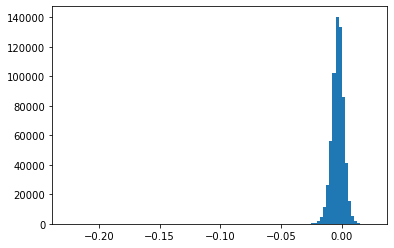

In [74]:
plot_distribution(mean_values, 'mean values across entries')

Median values across entries

Mean median values across entries: 8.126781722239684e-06
Median median values across entries: 0.00010000000474974513
Max median values across entries: 0.04960000142455101
Min median values across entries: -0.060999996960163116


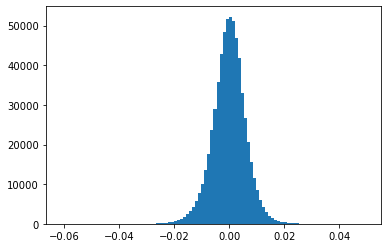

In [75]:
plot_distribution(median_values, 'median values across entries')

Max values across entries

Mean max values across entries: 0.30751845240592957
Median max values across entries: 0.2913999855518341
Max max values across entries: 7.430200099945068
Min max values across entries: 0.05389999970793724


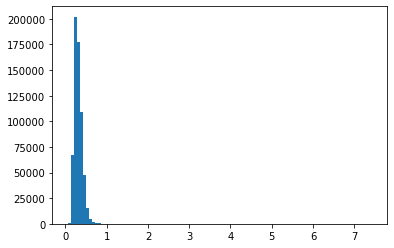

In [76]:
plot_distribution(max_values, 'max values across entries')

Min values across entries

Mean min values across entries: -0.8396312594413757
Median min values across entries: -0.8338000178337097
Max min values across entries: -0.4749000072479248
Min min values across entries: -57.30699920654297


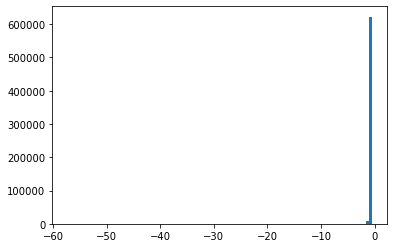

In [77]:
plot_distribution(min_values, 'min values across entries')

There are clear outliers.

Next step is to find out whether we have to filter embeddings in general, or it is a problem with only some of dimensions, and we can get rid of it.

In [106]:
mean_values_per_dim = np.mean(em.vectors, axis=0)
median_values_per_dim = np.median(em.vectors, axis=0)
max_values_per_dim = np.max(em.vectors, axis=0)
min_values_per_dim = np.min(em.vectors, axis=0)

Mean values across dimensions

Mean mean values across dimensions: -0.003153401892632246
Median mean values across dimensions: 0.0006508835358545184
Max mean values across dimensions: 0.07590746134519577
Min mean values across dimensions: -0.8359929919242859


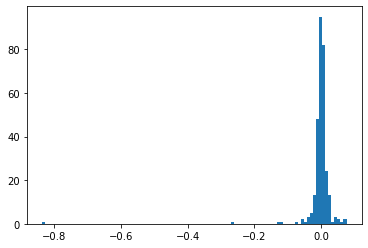

In [107]:
plot_distribution(mean_values_per_dim, 'mean values across dimensions')

Median values across dimensions

Mean median values across dimensions: -0.0033461253624409437
Median median values across dimensions: 0.0005999999702908099
Max median values across dimensions: 0.06719999760389328
Min median values across dimensions: -0.8335000276565552


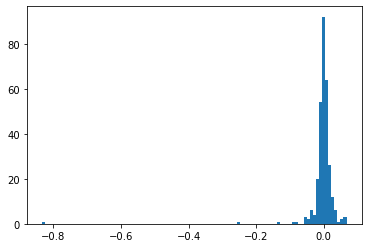

In [108]:
plot_distribution(median_values_per_dim, 'median values across dimensions')

Max values across dimensions

Mean max values across dimensions: 1.0163142681121826
Median max values across dimensions: 0.8324500322341919
Max max values across dimensions: 7.430200099945068
Min max values across dimensions: -0.1266999989748001


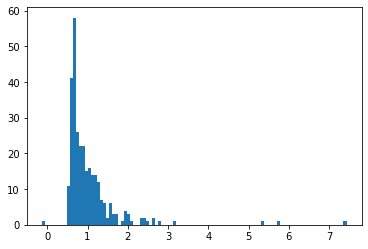

In [109]:
plot_distribution(max_values_per_dim, 'max values across dimensions')

Min values across dimensions

Mean min values across dimensions: -1.2787516117095947
Median min values across dimensions: -0.7749999761581421
Max min values across dimensions: -0.5239999890327454
Min min values across dimensions: -57.30699920654297


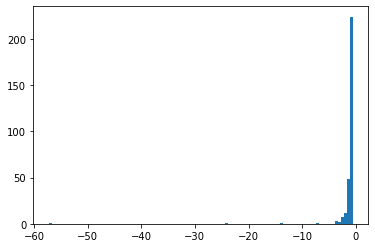

In [110]:
plot_distribution(min_values_per_dim, 'min values across dimensions')

### Clearly there are outliers both in entries and dimensions.

Next step is to find the exact amount and try to filter them out.

In [111]:
def filter_values(array, limits, title):
    filtered_out_idx =  (array < limits[0]) | (array > limits[1])
    filtered_out = array[filtered_out_idx]
    print(f'Filtered out by {title} in {limits}: {filtered_out.shape[0]}')
    return filtered_out_idx

In [112]:
# Per entry limits
mean_limits = (-0.03, 0.03)
median_limits = (-0.04, 0.04)
max_limits = (0, 1)
min_limits = (-1, 0)

In [116]:
mean_filtered_out_idx = filter_values(mean_values, mean_limits, 'mean')
median_filtered_out_idx = filter_values(median_values, median_limits, 'median')
max_filtered_out_idx = filter_values(max_values, max_limits, 'max')
min_filtered_out_idx = filter_values(min_values, min_limits, 'min')

total_entry_filter_idx = mean_filtered_out_idx | median_filtered_out_idx | max_filtered_out_idx | min_filtered_out_idx
print(f'Total filtered out entries count: {em.vectors[total_entry_filter_idx].shape[0]}')

Filtered out by mean in (-0.03, 0.03): 118
Filtered out by median in (-0.04, 0.04): 4
Filtered out by max in (0, 1): 530
Filtered out by min in (-1, 0): 18219
Total filtered out entries count: 18619


In [124]:
# Per dimension limits
mean_dim_limits = (-0.1, 0.1)
median_dim_limits = (-0.1, 0.1)
max_dim_limits = (0, 2)
min_dim_limits = (-2, 0)

mean_dim_filtered_out_idx = filter_values(mean_values_per_dim, mean_dim_limits, 'mean per dimension')
median_dim_filtered_out_idx = filter_values(median_values_per_dim, median_dim_limits, 'median per dimension')
max_dim_filtered_out_idx = filter_values(max_values_per_dim, max_dim_limits, 'max per dimension')
min_dim_filtered_out_idx = filter_values(min_values_per_dim, min_dim_limits, 'min per dimension')

total_dimension_filter_idx = mean_dim_filtered_out_idx | median_dim_filtered_out_idx | max_dim_filtered_out_idx | min_dim_filtered_out_idx
print(f'Total filtered out dimensions count: {em.vectors[0][total_dimension_filter_idx].shape[0]}')

Filtered out by mean per dimension in (-0.1, 0.1): 4
Filtered out by median per dimension in (-0.1, 0.1): 3
Filtered out by max per dimension in (0, 2): 17
Filtered out by min per dimension in (-2, 0): 21
Total filtered out entries count: 35


#### Intermediate summary
Of course, losing 19k entries from 630k dictionary, which is ~3% of all entries is far less damaging than losing 35 dimensions from 300 dimensioned embedding, which is ~12% of all dimensions.

The safest strategy is to filter out entries, check if the remaining words are enough to cover a generic text, and then repeat analysis of dimension outliers, and clean them if necessary.

### Try find outliers:

Use IsolationForest and LocalOutlierFactor to get rid from anomalies

In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# setup isolation forest to get rid from 1000 most anomalous words
#isolation_forest = IsolationForest(contamination=0.0016)
isolation_forest = IsolationForest()
print('Fitting...')
isolation_forest.fit(em.vectors)

print('Predicting...')
outlier_mask = isolation_forest.predict(em.vectors)
outlier_idx = outlier_mask == -1
outlier_words = em.words[outlier_idx]

print(f'Number of anomalies: {outlier_words.shape[0]}')

In [37]:
corrected_vectors = em.vectors[~outlier_idx]

print('mean:', np.mean(corrected_vectors))
print('median:', np.median(corrected_vectors))
print('max:', np.max(corrected_vectors))
print('min:', np.min(corrected_vectors))

mean: -0.003091353
median: 1e-04
max: 4.8304
min: -27.7679
